# Covid-19 Sentiment Analysis
#### Source: https://www.kaggle.com/smid80/coronavirus-covid19-tweets

Preprocessing:
1. To reduce data set size, take smaller random samples from each date
2. Delete quotes or retweets, etc.
3. Remove columns: reply_to_status_id, reply_to_user_id, reply_to_screen_name
4. Remove rows without country_code (make a separate dataframe for this)
    This will be purley for tweet counts from various countries

Analysis:
1. See which countries have the most tweets.*
2. Textblob for sentiment analysis. Potential questions: How sentiment differs from country, over time
3. ML clustering based on sentiment. (Review ML stuff)
4. Most popular tweets/tweets by people with most followers *
5. See number of followers, favs, etc. based on country or location *
6. Time series of total number of tweets in US over time. As well as total global tweets over time


## Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from random import randint
import os
#from urllib.request import urlopen
#from bs4 import BeautifulSoup
%matplotlib inline

In [2]:
"""
searches = ['hand sanitzer', 'toilet paper', 'wipes', 'soap']
url = "https://www.amazon.com/ref=nav_logo"
html = urlopen(url)
"""

'\nsearches = [\'hand sanitzer\', \'toilet paper\', \'wipes\', \'soap\']\nurl = "https://www.amazon.com/ref=nav_logo"\nhtml = urlopen(url)\n'

In [3]:
march_df = []
path = r'C:\Users\thead\Desktop\Summer 2020 ML Learning\Covid19AnalysisAndSentiment\Covid19March'
os.chdir(path)

for file in os.listdir():
    filename = os.fsdecode(file)#basically just returns a string..
    if filename.endswith('.CSV'):
        march_df.append(str(filename))

In [4]:
#Params: array of dataframes, and list of columns
def dropColumn(df_arr, columns):
    for i in range(0,len(df_arr)):
        df_arr[i] = df_arr[i].drop(columns, axis = 1)

In [5]:
def dropRow(df_arr,row):
    new_arr = [0]*len(df_arr)
    for i in range(0, len(df_arr)):
        df_arr[i][row] = df_arr[i][row].fillna(0)
        new_arr[i] = df_arr[i].loc[(df_arr[i][row] != 0)].reset_index()
    return new_arr

In [6]:
def randomTweet(df_arr):
    randDf = randint(0, len(df_arr)-1)
    randInd = randint(0, len(df_arr[randDf]['text'])-1)
    text = df_arr[randDf]['text'][randInd]
    screenName = df_arr[randDf]['screen_name'][randInd]
    return text, screenName

In [7]:
#Print most favorited
def mostFavorited(df_arr):
    for df in df_arr:
        maxFavs = max(df['favourites_count'])
        rowNum = list(df['favourites_count']).index(maxFavs)
        author = df['screen_name'][rowNum]
        retweets = df['retweet_count'][rowNum]
        followers = df['followers_count'][rowNum]
        tweet = df['text'][rowNum]
        time = df['created_at'][rowNum]
        print(maxFavs,' Favorites, ',retweets,' Retweets and ',followers,' Followers - ', author)
        print("Time: ", time)
        print("Tweet: ", tweet,"\n----------------------------------------------------------")

In [8]:
#Print most popular
def mostFollowers(df_arr):
    for df in df_arr:
        maxFol = max(df['followers_count'])
        rowNum = list(df['followers_count']).index(maxFavs)
        author = df['screen_name'][rowNum]
        print(maxFol,' - ', author)

In [9]:
for i in range(0,len(march_df)):
    march_df[i] = pd.read_csv(march_df[i])

In [10]:
for i in range(0,len(march_df)):
    march_df[i] = march_df[i].drop(['reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name'],axis = 1)

In [11]:
april_df = []
apath = r'C:\Users\thead\Desktop\Summer 2020 ML Learning\Covid19AnalysisAndSentiment\Covid19April'
os.chdir(apath)

for file in os.listdir():
    filename = os.fsdecode(file)#basically just returns a string..
    if filename.endswith('.CSV'):
        april_df.append(str(filename))

In [12]:
for i in range(0,len(april_df)):
    april_df[i] = pd.read_csv(april_df[i])

In [13]:
for i in range(0,len(april_df)):
    april_df[i] = april_df[i].drop(['reply_to_status_id', 'reply_to_user_id', 'reply_to_screen_name'],axis = 1)

In [14]:
dropColumn(april_df, ['account_lang', 'place_type'])
dropColumn(march_df, ['account_lang','place_type'])

In [15]:
march_df[0].head()

,status_id,user_id,created_at,screen_name,text,source,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,followers_count,friends_count,account_created_at,verified,lang
0,1244051646071611394,860252856829587457,2020-03-29T00:00:00Z,IMSS_SanLuis,"Ante cualquier enfermedad respiratoria, no te ...",TweetDeck,False,False,300,0,NaN,NaN,1008,41,2017-05-04T22:00:38Z,False,es
1,1244051645039706112,1125933654943895553,2020-03-29T00:00:00Z,intrac_ccs,#ATENCIÓN En el Terminal Nuevo Circo se implem...,TweetDeck,False,False,1030,1,NaN,NaN,90,316,2019-05-08T01:21:16Z,False,es
2,1244051645975191557,80943559,2020-03-29T00:00:00Z,rlieving,“People are just storing up. They are staying ...,TweetDeck,False,False,604,0,NaN,NaN,136,457,2009-10-08T21:06:08Z,False,en
3,1244051646750928897,817072420947247104,2020-03-29T00:00:00Z,Tu_IMSS_Coah,"Si empezaste a trabajar, necesitas dar de alta...",TweetDeck,False,False,1827,0,NaN,NaN,1549,170,2017-01-05T18:17:00Z,False,es
4,1244051647032102914,788863557349670913,2020-03-29T00:00:00Z,Tabasco_IMSS,Una sociedad informada está mejor preparada an...,TweetDeck,False,False,723,0,NaN,NaN,868,125,2016-10-19T22:05:03Z,False,es


### Below are dataframes with rows of NaN country_code dropped

In [16]:
march_df_cc = dropRow(march_df, 'country_code')

In [17]:
april_df_cc = dropRow(april_df,'country_code')

In [18]:
april_df_cc[0].head()

,index,status_id,user_id,created_at,screen_name,text,source,is_quote,is_retweet,favourites_count,retweet_count,country_code,place_full_name,followers_count,friends_count,account_created_at,verified,lang
0,157,1250574631616069641,626679510,2020-04-16T00:00:01Z,SeanDMackNYC,This should make my meetings way more producti...,Twitter for Android,False,False,1096,0,US,"Manhattan, NY",3891,4178,2012-07-04T16:48:10Z,False,en
1,260,1250574678541942786,794120640,2020-04-16T00:00:12Z,josemarceloroch,Vendo a quantidade de dificuldades que princip...,Twitter for Android,False,False,834,0,BR,"Caldas Novas, Brasil",81,396,2012-08-31T15:44:33Z,False,pt
2,268,1250574683453431808,1211950858746785793,2020-04-16T00:00:13Z,EDNewsChina,"Grand Bazaar, a famous tourist site and a good...",Twitter for iPhone,False,False,3843,0,CN,"Beijing, People's Republic of China",6182,109,2019-12-31T10:03:22Z,False,en
3,271,1250574684468531200,43571133,2020-04-16T00:00:13Z,IronsMeroL,Mañana empieza la #Fase3 del #COVID_19 y tenem...,Twitter for iPhone,False,False,312,0,MX,"Benito Juárez, Distrito Federal",150,40,2009-05-30T18:38:36Z,False,es
4,352,1250574719692275714,418957441,2020-04-16T00:00:22Z,MeducaPma,"""Los docentes deberán acogerse al Decreto Ejec...",Twitter for Android,False,False,5996,19,PA,Panama,82779,100,2011-11-22T19:37:37Z,False,es


In [19]:
#Prints 5 random tweets of April
for i in range(0,5):
    text, screenName = randomTweet(april_df_cc)
    print(text,' - ',screenName,'\n------------------------------------------------------\n')

@rainl1980 @AmazonUK That's appalling @AmazonUK Are there not guidelines to your delivery drivers concerning #SocialDistancing and #Pensioner health? #Disappointing #Covid_19  -  SteelCityAdy 
------------------------------------------------------

Just because things are reopening, that doesn't mean the virus is magically gone or any less dangerous/spreadable. Don't be dumb and still only get things when essential people.

#COVID19 #coronavirus  -  perryKIDjh 
------------------------------------------------------

#covidhaircut #covid19 
#homehaircut #homehaircuts #disaster #westportmoms #westportct #westportsalon #austinrolfe #austinrolfesalon @ Austin - Rolfe Salon https://t.co/hP57Vtfktn  -  ARSalonCT 
------------------------------------------------------

Nalulungkot akong malaman ang aking bansa ay nangangailangan ng mga nars 😷 🦠
I am sad my country is in need of nurses, a lot are dying of #COVID19 
As a model girl in the Philippines I give my❤️ to all.
Here in Japan 🇯🇵my best 

### Popular tweets of March

In [20]:
#Most popular tweets of March:
mostFavorited(march_df)

1536144  Favorites,  48  Retweets and  216960  Followers -  David_Leavitt
Time:  2020-03-29T18:30:58Z
Tweet:  Seeing your friends after the #coronavirus quarantine ends https://t.co/AQrU0s0ScV 
----------------------------------------------------------
1537325  Favorites,  74  Retweets and  217114  Followers -  David_Leavitt
Time:  2020-03-30T21:31:36Z
Tweet:  Trump is an absolute narcissistic asshole. At the #coronavirus briefing he started talking about his hair.

"My hair is blowing in the wind and it’s mine. That’s one thing you can’t get away with if you’re president." 
----------------------------------------------------------
1537913  Favorites,  34  Retweets and  217309  Followers -  David_Leavitt
Time:  2020-03-31T22:09:15Z
Tweet:  "Yes. Over 100,000 Americans will die from #Coronavirus"

That means it's probably going to be way more

😰 
----------------------------------------------------------
1538285  Favorites,  226  Retweets and  217530  Followers -  David_Leavitt
Time:  

### Popular tweets of April

In [21]:
#Most popular tweets of April:
mostFavorited(april_df)

1989090  Favorites,  1  Retweets and  22629  Followers -  ChelseaAMusic
Time:  2020-04-16T19:59:57Z
Tweet:  Ever since the #COVID19 epidemic began i think I've only taken 2 naps 😴 the whole time that's how much my anxiety has been bothering me it's so not fun at all!! 😢😭 
----------------------------------------------------------
1352107  Favorites,  2  Retweets and  73040  Followers -  GokhanAkar
Time:  2020-04-17T11:13:16Z
Tweet:  Geçen Gün Canlı Yayında Teknik Bir Kaza Sonucu Tavşan Olarak Şarkı Söylemeye Devam Ettikten Sonra
Bu Akşam Saat 20.00 da
Instagram Hesabımda
Civciv 🐥 Olarak
Şarkı Söylemeyi Düşünüyorum...
Tüm Arkadaşlar da Civciv Olarak Yayınıma Katılsınlar Lütfen.
🐥🐥🐥♥️
#EvdeKal #coronavirus https://t.co/m8y6xcx6dj 
----------------------------------------------------------
1990673  Favorites,  0  Retweets and  22639  Followers -  ChelseaAMusic
Time:  2020-04-18T21:19:51Z
Tweet:  Very true we are One World 🌎 it's time we start acting like one instead of fighting with one a

## Dividing data by country_code

In [22]:
top_codes = april_df_cc[0]['country_code'].value_counts()[0:31]#one day find an autmoatic way to get values >100
print(top_codes[0:5])

US    5827
IN    2814
GB    2494
ES    1144
BR     898
Name: country_code, dtype: int64


## Groupby analysis
Grouping by sum of followers, retweets, etc. for each country code

Preprocessing:
1. Concatenate individual March and April DataFrames. Concatenate two major dataframes for March and April
2. Drop categorical columns for groupby

In [23]:
def concatenate(arr_df):
    firstArr = arr_df[0]
    for i in range(1,len(arr_df)):
        firstArr = pd.concat([firstArr,arr_df[i]], axis = 0)
    return firstArr.reset_index()

In [24]:
april_full_cc = concatenate(april_df_cc)

In [25]:
march_full_cc = concatenate(march_df_cc)

In [31]:
full_cc = pd.concat([march_full_cc,april_full_cc],axis = 0)

In [61]:
countryTweetCount = full_cc_grouped['country_code'].value_counts()

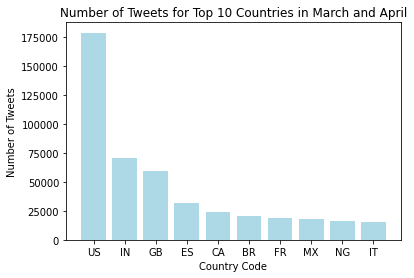

In [135]:
cc = list(countryTweetCount.index)[0:10]
counts = list(countryTweetCount)[0:10]
plt.bar(cc,counts, color = 'lightblue')
plt.xlabel("Country Code")
plt.ylabel("Number of Tweets")
plt.title("Number of Tweets for Top 10 Countries in March and April")
plt.show()

In [45]:
full_cc_grouped = full_cc.iloc[:,10:]
full_cc_grouped = full_cc_grouped.drop(['place_full_name','account_created_at','verified','lang'], axis = 1)
full_cc_grouped.head()

,favourites_count,retweet_count,country_code,followers_count,friends_count
0,534,0,IT,1241,430
1,1256,0,US,375,762
2,1561,4,MX,361,1035
3,1971,1,PA,1987,584
4,1205,1,CL,771,3590


In [101]:
full_cc_grouped_final = full_cc_grouped.groupby('country_code').sum().reset_index()
full_cc_grouped_final = full_cc_grouped_final.sort_values(by = ['favourites_count','followers_count'], ascending = False)
full_cc_grouped_final.head()

,country_code,favourites_count,retweet_count,followers_count,friends_count
206,US,3235269729,294069,936515244,509730576
68,GB,773514042,93283,189193762,124015321
94,IN,610958422,146578,693637932,54271780
60,ES,398937502,66082,109394067,52567766
35,CA,368298451,68143,90770241,42659274


## Grouped bar chart/Popularity assessment

Assessing Twitter popularity for each country as a whole

In [93]:
c = full_cc_grouped_final['country_code'][0:10]
total_favs = full_cc_grouped_final['favourites_count'][0:10]
total_rt = full_cc_grouped_final['retweet_count'][0:10]
total_fol = full_cc_grouped_final['followers_count'][0:10]

total_fr = full_cc_grouped_final['friends_count'][0:10]#may not be an accurate representation, There would be alot of repeats

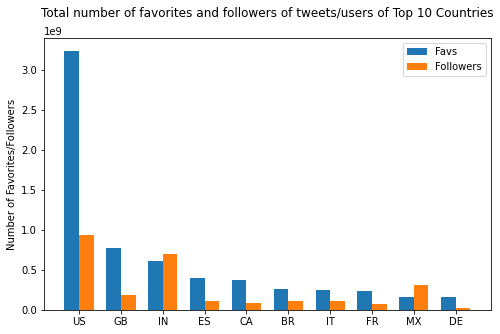

In [132]:
x = np.arange(len(c))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(8,5))
rects1 = ax.bar(x - width/2, total_favs, width, label='Favs')
rects2 = ax.bar(x + width/2, total_fol, width, label='Followers')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Number of Favorites/Followers')
ax.set_title('Total number of favorites and followers of tweets/users of Top 10 Countries\n')
ax.set_xticks(x)
ax.set_xticklabels(c)
ax.legend()


plt.show()

## US Tweets Over Time

Get total number of tweets for each consecutive day in the US. See how number of tweets changes over time.

## Global Number of Tweets Over Time

Do the same as above, but for all tweets across all countries

## Adding column for sentiment score
https://textblob.readthedocs.io/en/dev/